# HYPOTHESIS TESTING
## Heart Disease Research Part I
In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load & inspect dataset
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


In [3]:
# Create dataframe for patients diagnosed with heart disease
yes_hd = heart[heart.heart_disease == 'presence']

In [4]:
# Create dataframe for patients NOT diagnosed with heart disease
no_hd = heart[heart.heart_disease == 'absence']

## Cholesterol Analysis
### One
The full dataset has been loaded for you as `heart`, then split into two subsets:

`yes_hd`, which contains data for patients with heart disease
`no_hd`, which contains data for patients without heart disease
For this project, we’ll investigate the following variables:

- `chol`: serum cholestorol in mg/dl
- `fbs`: An indicator for whether fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false)

To start, we’ll investigate cholesterol levels for patients with heart disease. Use the dataset `yes_hd` to save cholesterol levels for patients with heart disease as a variable named *chol_hd*
.

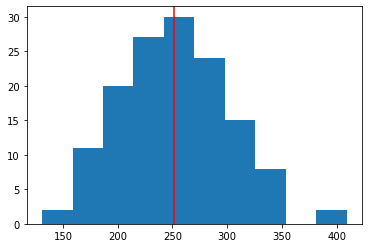

In [5]:
chol_hd = yes_hd.chol
plt.hist(chol_hd)
plt.axvline(np.mean(chol_hd), c='r')
plt.show()

### Two
In general, total cholesterol over 240 mg/dl is considered “high” (and therefore unhealthy). Calculate the mean cholesterol level for patients who were diagnosed with heart disease and print it out. Is it higher than 240 mg/dl?

In [6]:
# Yes.
np.mean(chol_hd)

251.4748201438849

### Three
Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

- Null: People with heart disease have an average cholesterol level equal to 240 mg/dl
- Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl

Note: Unfortunately, the scipy.stats function we’ve been using does not (at the time of writing) have an alternative parameter to change the alternative hypothesis for this test. Therefore, you’ll have to run a two-sided test. However, since you calculated earlier that the average cholesterol level for heart disease patients is greater than 240 mg/dl, you can calculate the p-value for the one-sided test indicated above simply by dividing the two-sided p-value in half.

In [7]:
from scipy.stats import ttest_1samp

### Four
Run the hypothesis test indicated in task 3 and print out the p-value. Can you conclude that heart disease patients have an average cholesterol level significantly greater than 240 mg/dl? Use a significance threshold of 0.05.

In [8]:
t_stat, p_val = ttest_1samp(chol_hd, 240)

In [9]:
# Null hypotheses with alpha of 0.05 must be rejected, therefore:
# Yes, It's likely that people with heart disease have an average cholesterol level that is greater than 240 mg/dl
print("p-value divided by 2: ", p_val / 2)

p-value divided by 2:  0.0035411033905155707


### Five
Repeat steps 1-4 in order to run the same hypothesis test, but for patients in the sample who were not diagnosed with heart disease. Do patients without heart disease have average cholesterol levels significantly above 240 mg/dl?

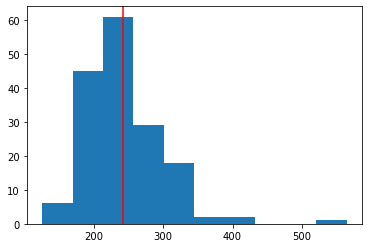

In [10]:
# Cholesterol levels among patients without heart disease
chol_no_hd = no_hd.chol
plt.hist(chol_no_hd)
plt.axvline(np.mean(chol_no_hd), c='r')
plt.show()

In [11]:
# Average cholesterol level is almost 9 mg/dl lower in patients without heart disease
np.mean(chol_no_hd)

242.640243902439

In [12]:
t_stat2, p_val2 = ttest_1samp(chol_no_hd, 240)

In [13]:
# Null hypotheses with alpha of 0.05 must NOT be rejected, therefore:
# People without diagnosed heart disease have an average cholesterol level of 240 mg/dl
print("p-value divided by 2: ", p_val2 / 2)

p-value divided by 2:  0.26397120232220506


## Fasting Blood Sugar Analysis
### Six
Let’s now return to the full dataset (saved as `heart`). How many patients are there in this dataset? Save the number of patients as *num_patients* and print it out.

In [14]:
num_patients = len(heart)
num_patients

303

### Seven
Remember that the fbs column of this dataset indicates whether or not a patient’s fasting blood sugar was greater than 120 mg/dl (1 means that their fasting blood sugar was greater than 120 mg/dl; 0 means it was less than or equal to 120 mg/dl).

Calculate the number of patients with fasting blood sugar greater than 120. Save this number as *num_highfbs_patients* and print it out.

In [15]:
num_highfbs_patients = np.sum(heart.fbs == 1)
num_highfbs_patients

45

### Eight
Sometimes, part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population.

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes). If this sample were representative of the population, approximately how many people would you expect to have diabetes? Calculate and print out this number.

Is this value similar to the number of patients with a resting blood sugar above 120 mg/dl — or different?

In [16]:
print("Expected num of people with diabetes: ", num_patients * .08)
print("Num people with fbs > 120 mg/dl: ", num_highfbs_patients)
print("The values are pretty far apart.")

Expected num of people with diabetes:  24.240000000000002
Num people with fbs > 120 mg/dl:  45
The values are pretty far apart.


### Nine
Does this sample come from a population in which the rate of fbs > 120 mg/dl is equal to 8%? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

- Null: This sample was drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl
- Alternative: This sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl

In [17]:
from scipy.stats import binom_test

In [18]:
p_value_1sided = binom_test(num_highfbs_patients, n= num_patients, p= 0.08, alternative= 'greater')

### Ten
Run the hypothesis test indicated in task 9 and print out the p-value. Using a significance threshold of 0.05, can you conclude that this sample was drawn from a population where the rate of fasting blood sugar > 120 mg/dl is significantly greater than 8%?

In [19]:
# The small p-value indicates we must reject the null hypothesis and accept the alternative that the
# sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl
p_value_1sided

4.689471951449078e-05